In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# machine learning
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
# from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.ensemble import  BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor



def f(x1, x2):
    y = 0.5 * np.sin(x1) + 0.5 * np.cos(x2) + 3 + 0.1 * x1 
    return y

def load_data():
    x1_train = np.linspace(0,50,500)
    x2_train = np.linspace(-10,10,500)
    data_train = np.array([[x1,x2,f(x1,x2) + (np.random.random(1)-0.5)] for x1,x2 in zip(x1_train, x2_train)])
    x1_test = np.linspace(0,50,100)+ 0.5 * np.random.random(100)
    x2_test = np.linspace(-10,10,100) + 0.02 * np.random.random(100)
    data_test = np.array([[x1,x2,f(x1,x2)] for x1,x2 in zip(x1_test, x2_test)])
    return data_train, data_test

train, test = load_data()
ss = StandardScaler()
train = ss.fit_transform(train)
test = ss.fit_transform(test)
x_train, y_train = train[:,:2], train[:,2] #数据前两列是x1,x2 第三列是y,这里的y有随机噪声
x_test ,y_test = test[:,:2], test[:,2] # 同上,不过这里的y没有噪声



clfs = {
#     'svm': SVC(),\
    'decision_tree':DecisionTreeRegressor(),
#     'naive_gaussian': GaussianNB(), \
#     'naive_mul':MultinomialNB(),\
    'K_neighbor' : KNeighborsRegressor(),\
    'bagging_knn' : BaggingRegressor(KNeighborsRegressor(), max_samples=0.5,max_features=0.5), \
    'bagging_tree': BaggingRegressor(DecisionTreeRegressor(), max_samples=0.5,max_features=0.5),
    'random_forest' : RandomForestRegressor(n_estimators=50),\
    'adaboost':AdaBoostRegressor(n_estimators=50),\
    'gradient_boost' : GradientBoostingRegressor(n_estimators=50, learning_rate=1.0,max_depth=1, random_state=0)
        }

# def try_different_method(clf):
#     clf.fit(x_train,y_train.ravel())
#     score = clf.score(x_test,y_test.ravel())
#     print('the score is :', score)

for clf_key in clfs.keys():
    print('the classifier is :',clf_key)
    clf = clfs[clf_key]
    try_different_method(clf)


def try_different_method(clf):
    clf.fit(x_train,y_train)
    score = clf.score(x_test, y_test)
    result = clf.predict(x_test)
#     print(result.shape)
#     print(y_test.shape)
#     print(result)
    score = clf.score(x_test,y_test.ravel())
#     score = clf.sorre(x_test,y_test.reshape(-1,1))
#     print("score =",score)
    print("score ={0}".format(score))
    
#     fpr,tpr,threshold = roc_curve(y_test, result)
#     accuracy_score仅适用分类
#     print("accuracy_score=",accuracy_score(result.reshape(-1,1), y_test.reshape(-1,1)))
#      绘图
#     plt.figure()
#     plt.plot(np.arange(len(result)), y_test,'go-',label='true value')
#     plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
#     plt.title('score: %f'%score)
#     plt.legend()
#     plt.show()

the classifier is : decision_tree
score =0.9497850262872065
the classifier is : K_neighbor
score =0.9897046053081161
the classifier is : bagging_knn
score =0.9923589826162946
the classifier is : bagging_tree
score =0.9854769771289044
the classifier is : random_forest
score =0.9838840209801661
the classifier is : adaboost
score =0.9681805394700704
the classifier is : gradient_boost
score =0.9622114284550636


In [163]:
#自定义处理方法
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # 遍历所有模型，你和数据
    def fit(self, X, y):
        
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
#             print('model',model)
            model.fit(X, y)

        return self
    
    # 预估，并对预估结果值做average
    def predict(self, X):
        print('self',self)
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
                
        ])
        for model in self.models_:
            print('model',model)
        #return 0.85*predictions[:,0]+0.15*predictions[:,1]
        #return 0.7*predictions[:,0]+0.15*predictions[:,1]+0.15*predictions[:,2]
        return np.mean(predictions, axis=1)   
    
    

In [164]:
averaged_models = AveragingModels(models = (clfs['bagging_knn'],clfs['K_neighbor']))
averaged_models.fit(x_train,y_train)
p = averaged_models.predict(x_test)
score = averaged_models.score(x_test,y_test.ravel())
print(score)

self AveragingModels(models=(BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, ...owski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')))
model BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
model KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')
se

In [98]:
# Debug
from sklearn import utils
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))

print(y_train.shape)
print(y_train.ravel().shape)


continuous
multiclass
(500,)
(500,)


<function dict.values>

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(n_estimators=100)
try_different_method(gbrt)

score = 0.9882536093498375


In [65]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
try_different_method(linear_reg)

score = 0.8893080881790152


0.8541048584911679


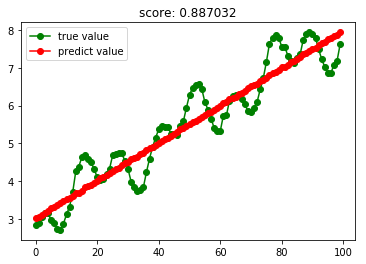

In [24]:
from sklearn.pipeline import make_pipeline
line = make_pipeline(LinearRegression())
try_different_method(linear_reg)

In [ ]:
# 待实现
# GridSearchCV，cross_val_score
# 待了解
# BaseEstimator提供除其他事项外为get_params和set_params方法的默认实现
# 对于使用GridSearchCV进行自动化参数调整时可以搜索模型网格非常有用
# 在Pipeline中组合时可以与其他人一起良好地执行。
# ensemble
# base(BaseEstimator, TransformerMixin, RegressorMixin)
